# My Deep Learning Framework

In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Labels
- 0 T-shirt/top
- 1 Trouser
- 2 Pullover
- 3 Dress
- 4 Coat
- 5 Sandal
- 6 Shirt
- 7 Sneaker
- 8 Bag
- 9 Ankle boot

In [2]:
articles = {
            0: "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat", 
            5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle boot"}

def get_article(id):
    return articles.get(id)

### Matrix Utilities

In [3]:
def random_matrix(n_rows, n_cols, n_decimals=4):
    matrix = []
    for _ in range(n_rows):
        cols = []
        for _ in range(n_cols):
            number = round(random.random(),n_decimals)
            cols.append(number)
        matrix.append(cols)
    return matrix
    
def create_matrix(n_rows, n_cols, value=0):
    return [ [ value for _ in range(n_cols)] for _ in range(n_rows) ]

def create_vector(n_size, value=0):
    return [value for _ in range(n_size)]


def reshape_vector(vector, n_rows):
    matrix = []
    n_cols = int(len(vector) / n_rows)
    begin = 0
    for _ in range(n_rows):
        row = vector[begin : begin + n_cols]
        matrix.append(row)
        begin +=  n_cols
    return matrix

def multiply_matrix(matrix_A, matrix_B):
    A_rows, A_cols = len(matrix_A), len(matrix_A[0])
    B_rows, B_cols = len(matrix_B), len(matrix_B[0])

    #if A_cols != B_rows: 
    #    raise ValueError(f"Incompatible dimentions: A col: {A_cols} != {B_rows}" )
    
    result_matrix = create_matrix(A_rows, B_cols)
    
    for i in range(A_rows):
        for j in range(B_cols):
            for k in range(B_rows):
                result_matrix[i][j] += matrix_A[i][k] * matrix_B[k][j]

    return result_matrix

#print(random_matrix(2,2))
#rint(create_vector(5))
#print(create_matrix(5, 2))
#print(reshape_vector([1,2,3,4,5,6], 3))
A = [[1, 2, 3], 
    [4, 5, 6]]
B = [[1, 2, 3, 4], 
    [5, 6, 7, 8], 
    [9, 10, 11, 12]]

multiply_matrix(A, B)

[[38, 44, 50, 56], [83, 98, 113, 128]]

## Loading Fashion MNIST data

### Loading without libraries

In [4]:
base_data_path = 'fashion-mnist-data'

def load_data():
    y_data = []
    x_data = []

    with open(f'./{base_data_path}/fashion-mnist_train.csv', "r") as file:
        next(file)
        for index, line in enumerate(file.readlines()):
            y_data.append(int(line.split(",")[0]))
            x_data.append([ int(pixel) for pixel in line.split(",")[1:] ])
            if index >= 16: break
    return x_data, y_data

X_raw,Y_raw = load_data()

In [5]:
len(X_raw), len(X_raw[0])

(17, 784)

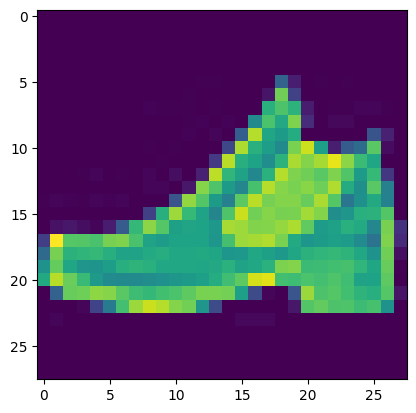

(9, 'Ankle boot')

In [6]:
x_img = reshape_vector(X_raw[1],28)
plt.imshow(x_img)
plt.show()
Y_raw[1], get_article(Y_raw[1])

### Working with pandas and numpy

In [7]:
df = pd.read_csv(f'./{base_data_path}/fashion-mnist_train.csv')
df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
data = np.array(df)
m, n = data.shape
np.random.shuffle(data)

data_test = data[0:1000].T
X_test = data_test[1:n]
Y_test = data_test[0]

data_train = data[1000:m].T
X_train = data_train[1:n]
Y_train = data_train[0]

# Normalization
X_test = X_test / 255
X_train = X_train / 255


In [9]:
X_train.shape, Y_train.shape

((784, 59000), (59000,))

### Building the Neural Network

In [10]:
def initialize_params(batch_size=16):
    params = {}
    n_neurons_l2 = 25
    params['W1'] = np.random.randn(batch_size, 784)
    params['b1'] = np.zeros(shape=(batch_size, 1))

    params['W2'] = np.random.randn(n_neurons_l2, batch_size)
    params['b2'] = np.zeros(shape=(n_neurons_l2, 1))

    params['W3'] = np.random.randn(10, n_neurons_l2)
    params['b3'] = np.zeros(shape=(10,1))
    
    return params

def relu(x):
    return np.maximum(x, 0)

def softmax(x):
    z = x - np.max(x, axis=0) # Subtract max value for numerical stability
    probs = np.exp(z) / np.sum(np.exp(z), axis=0)
    return probs

def cross_entropy(y_hat, y_one_hot):
    # y_one_hot es un vector con las probabilidades reales (etiquetas verdaderas)
    # y_hat es un vector con las probabilidades predichas por el modelo
    epsilon = 1e-15  # Valor pequeño para evitar divisiones por cero
    y_hat = np.maximum(epsilon, y_hat)  # Asegurarse de que no haya valores cercanos a cero
    return - np.sum(y_one_hot * np.log(y_hat))

def relu_prime(z):
    z[ z <= 0] = 0
    return z

def one_hot(y, k=10):
    one_hot_y = np.zeros(shape=(y.size, k))
    classes = np.arange(y.size)
    one_hot_y[classes, y] = 1
    # return the same format as 784 x batch_size
    return one_hot_y.T

def forward_propagation(X, params):
    params['Z1'] = np.dot(params['W1'], X) + params['b1']
    params['A1'] = relu(params['Z1'])

    params['Z2'] = np.dot(params['W2'], params['A1']) + params['b2']
    params['A2'] = relu(params['Z2'])
    
    params['Z3'] = np.dot(params['W3'], params['A2']) + params['b3']
    params['A3'] = softmax(params['Z3'])

    return params

def backward_propagation(X, Y, params):
    y_one_hot = one_hot(Y)
    loss = cross_entropy(params['A3'], y_one_hot) # y_hat - y

    params['dZ3'] = params['A3'] - y_one_hot
    params['dW3'] = params['dZ3'] @ params['A2'].T
    params['db3'] = params['dZ3']

    #dA2 = np.dot(params['dZ3'].T, params['W3'])
    dA2 = params['W3'].T @ params['dZ3']
    params['dZ2'] = dA2 * relu_prime(params['Z2'])
    params['dW2'] = params['dZ2'] @ params['A1'].T #
    params['db2'] = params['dZ2']
    #print(f"W3.T: {params['W3'].T.shape}")
    #print(f"dZ3: {params['dZ3'].shape}")
    #print()
    #print(f"dA2: {dA2.shape}")
    #print(f"Z2': {relu_prime(params['Z2']).shape}")

    dA1 = params['W2'].T @ params['dZ2']
    params['dZ1'] = dA1 * relu_prime(params['Z1'])
    params['dW1'] = params['dZ1'] @ X.T
    params['db1'] = params['dZ1']

    return loss, params

def update_params(lr, params):
    params['W1'] = params['W1'] - lr * params['dW1']
    params['b1'] = params['b1'] - lr * params['db1']
    params['W2'] = params['W2'] - lr * params['dW2']
    params['b2'] = params['b2'] - lr * params['db2']
    params['W3'] = params['W3'] - lr * params['dW3']
    params['b3'] = params['b3'] - lr * params['db3']
    return params

def get_batches(total_samples, batch_size=16):
    batches = []
    for split in range(0, total_samples, batch_size):
        if split + batch_size > total_samples: break
        start_index = split
        end_index = split + batch_size #if (split + batch_size <= total_samples)  else  total_samples
        batches.append((start_index, end_index))
    return batches

def get_accuracy(y_hat, y):
    predictions = np.argmax(y_hat, 0)
    return np.sum(predictions == y) / y.size

get_batches(100)

#A = [[-1, 0.5, -0.23], [0.67, -2.8, 2.12]]
#print(relu(A))
#print(softmax(A))

[(0, 16), (16, 32), (32, 48), (48, 64), (64, 80), (80, 96)]

Creating a Neural Network with:
- 3 layers: 1 input, 1 hidden, 1 output
- hidden layer

In [11]:
# X_train[:, 32:64].shape
X_train.shape

(784, 59000)

In [46]:
batch_size = 32
epochs = 500
learning_rate = 0.01

def train():

    X = X_train
    Y = Y_train

    params = initialize_params() # len(Y_train)

    for epoch in range(epochs):
        
        params = forward_propagation(X, params)
        loss, params = backward_propagation(X, Y, params)
        params = update_params(learning_rate, params)
        
        #if epoch % 10 == 0:
        acc = get_accuracy(params['A3'], Y)
        print(f"Epoc: {epoch + 1}, loss: {round(loss,4)}, acc: {acc}")
        

    return params
    
params = train()

Epoc: 1, loss: 1694505.0782, acc: 0.14198305084745763
Epoc: 2, loss: 1826755.8835, acc: 0.10355932203389831
Epoc: 3, loss: 1833836.3327, acc: 0.10008474576271187
Epoc: 4, loss: 1651616.7061, acc: 0.19477966101694916
Epoc: 5, loss: 910570.7516, acc: 0.5423220338983051
Epoc: 6, loss: 643005.2497, acc: 0.7003898305084746
Epoc: 7, loss: 179311.6647, acc: 0.8829322033898305
Epoc: 8, loss: 107930.5803, acc: 0.955864406779661
Epoc: 9, loss: 103106.3962, acc: 0.9565254237288136
Epoc: 10, loss: 100976.7257, acc: 0.9580847457627119
Epoc: 11, loss: 100340.9162, acc: 0.9610677966101695
Epoc: 12, loss: 99948.2143, acc: 0.9590169491525423
Epoc: 13, loss: 99476.6634, acc: 0.962135593220339
Epoc: 14, loss: 99069.3284, acc: 0.9596779661016949
Epoc: 15, loss: 98619.1772, acc: 0.9630677966101695
Epoc: 16, loss: 98201.7814, acc: 0.9608813559322034
Epoc: 17, loss: 97772.5886, acc: 0.963864406779661
Epoc: 18, loss: 97355.5935, acc: 0.9624237288135593
Epoc: 19, loss: 96937.1189, acc: 0.9650677966101695
Epoc:

batch_size = 32
epochs = 5
learning_rate = 0.01

def train():
    params = initialize_params(batch_size)

    total_samples = len(Y_train)
    batches = get_batches(total_samples, batch_size)
    
    for epoch in range(epochs):
        i = 0
        for start_index, end_index in batches:
            X = X_train[:, start_index:end_index]
            Y = Y_train[start_index:end_index]

            params = forward_propagation(X, params)

            loss, params = backward_propagation(X, Y, params)

            params = update_params(learning_rate, params)
            
            if i % 100 == 0:
                acc = get_accuracy(params['A3'], Y)
                print(f"Epoc: {epoch + 1}, batch:  {i}/{len(batches)}, loss: {round(loss,4)}, acc: {acc}")
            
            i += 1

    return params
    
params = train()

## Inferences

In [47]:
index_value = 10

In [48]:
Y_item_test = Y_test[index_value]
Y_item_test, get_article(Y_item_test)

(3, 'Dress')

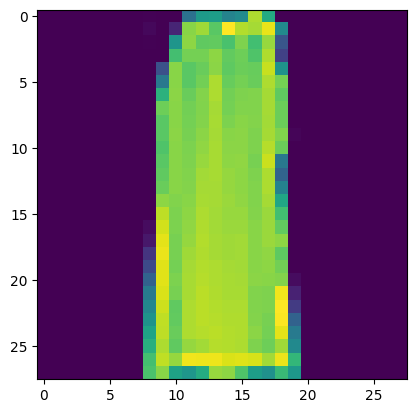

In [49]:
X_item_test = X_test[:, index_value, None]
img = X_item_test.reshape((28, 28)) * 255
plt.imshow(img)
plt.show()

In [50]:
def predict(index, X, params):
    params = forward_propagation(X, params)
    y_hat = params['A3']
    predictions = np.argmax(y_hat, 0)
    return predictions[index]

In [51]:
item_predicted = predict(index_value, X_item_test, params)
item_predicted, get_article(item_predicted)

(9, 'Ankle boot')